# Bayesian Statistics Made Simple

Code and exercises from my workshop on Bayesian statistics in Python.

Copyright 2020 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The cookie problem

> Suppose you have two bowls of cookies.  Bowl 1 contains 30 vanilla and 10 chocolate cookies.  Bowl 2 contains 20 vanilla of each.
>
> You choose one of the bowls at random and, without looking into the bowl, choose one of the cookies at random.  It turns out to be a vanilla cookie.
>
> What is the chance that you chose Bowl 1?

Assume that there was an equal chance of choosing either bowl and an equal chance of choosing any cookie in the bowl.

Here are the hypotheses and prior probabilities.

In [2]:
hypos = 'Bowl 1', 'Bowl 2'
probs = 1/2, 1/2

To compute the answer, I'll use a Pandas `Series` to represent the hypotheses and their probabilities.

In [3]:
prior = pd.Series(probs, hypos)
prior

Bowl 1    0.5
Bowl 2    0.5
dtype: float64

This `Series` represents a probability mass function (PMF).

Now we compute the likelihood of the data under each hypothesis.

* The chance of getting a vanilla cookie from Bowl 1 is 3/4.

* The chance of getting a vanilla cookie from Bowl 2 is 1/2.

In [4]:
likelihood = 3/4, 1/2

The next step is to multiply the priors by the likelihoods:

In [5]:
unnorm = prior * likelihood
unnorm

Bowl 1    0.375
Bowl 2    0.250
dtype: float64

The result is called `unnorm` because it is an "unnormalized posterior".

To compute the posteriors, we have to divide through by $P(D)$, which is the sum of the unnormalized posteriors.

In [6]:
prob_data = unnorm.sum()
prob_data

0.625

Notice that we get 5/8, which is what we got by computing $P(D)$ directly.

Now we divide by `prob_data` to get the normalized posteriors:

In [7]:
posterior = unnorm / prob_data
posterior

Bowl 1    0.6
Bowl 2    0.4
dtype: float64

The posterior probability for Bowl 1 is 0.6, which is what we got using Bayes's Theorem explicitly.

As a bonus, we also get the posterior probability of Bowl 2, which is 0.4.

The posterior probabilities add up to 1, which they should, because the hypotheses are "complementary"; that is, either one of them is true or the other, but not both.

When we add up the unnormalized posteriors and divide through, we force the posteriors to add up to 1.  This process is called "normalization", which is why the total probability of the data is also called the "[normalizing constant](https://en.wikipedia.org/wiki/Normalizing_constant#Bayes'_theorem)"


### Exercise 1

Suppose we put the first cookie back, stir, draw another cookie from the same bowl, and it's a chocolate cookie.  What is the probability we drew both cookies from Bowl 1?

Hint: The prior for the second update is the posterior from the first update.

In [8]:
prior2 = posterior
prior2

Bowl 1    0.6
Bowl 2    0.4
dtype: float64

Now 

1. Compute the likelihood of the data under each hypothesis,
2. Multiply the new prior by the likelihoods.
3. Divide through by the total probability of the data.

In [9]:
# Solution

likelihood2 = 1/4, 1/2

In [10]:
# Solution

unnorm2 = prior2 * likelihood2
unnorm2

Bowl 1    0.15
Bowl 2    0.20
dtype: float64

In [11]:
# Solution

prob_data2 = unnorm2.sum()
prob_data2

0.35

In [12]:
# Solution

posterior2 = unnorm2 / prob_data2
posterior2

Bowl 1    0.428571
Bowl 2    0.571429
dtype: float64

## 101 Bowls

Suppose instead of 2 bowls there are 101 bowls:

* Bowl 0 contains no vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

As in the previous problem, there are only two kinds of cookies, vanilla and chocolate.  So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla.  What is the probability that the cookie came from Bowl $x$, for each value of $x$?

To represent the prior, I'll use a Pandas `Series` with 101 equally spaced quantities from 0 to 1.

In [13]:
xs = np.linspace(0, 1, num=101)
prob = 1/101

prior = pd.Series(prob, xs)
prior.head()

0.00    0.009901
0.01    0.009901
0.02    0.009901
0.03    0.009901
0.04    0.009901
dtype: float64

Here's what it looks like.

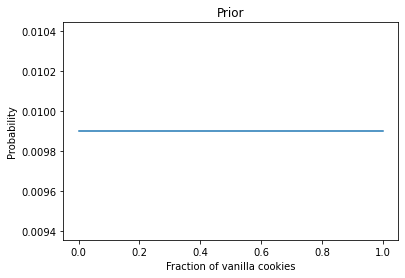

In [14]:
prior.plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Prior');

Now that we have a prior, we need to compute likelihoods.

Here are the likelihoods for a vanilla cookie:

In [15]:
likelihood_vanilla = xs

And for a chocolate cookie.

In [16]:
likelihood_chocolate = 1 - xs

To compute unnormalized posteriors, we multiply the priors and the likelihoods.

In [17]:
unnorm = prior * likelihood_vanilla

To normalize, we divide through by the total probability of the data.

In [18]:
posterior = unnorm / unnorm.sum()

Here's what the posterior looks like.

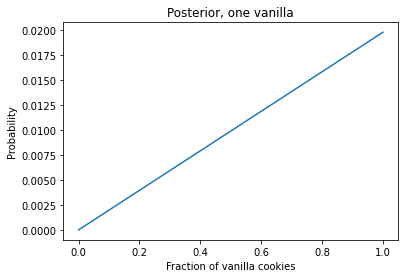

In [19]:
posterior.plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Posterior, one vanilla');

Suppose we put the first cookie back, stir the bowl, draw from the same bowl again, and get a vanilla cookie again.

What's are the posterior probabilities now?

We can do another update, using the posterior from the first draw as the prior for the second draw.

In [20]:
prior2 = posterior
unnorm2 = prior2 * likelihood_vanilla
posterior2 = unnorm2 / unnorm2.sum()

And here's what it looks like.

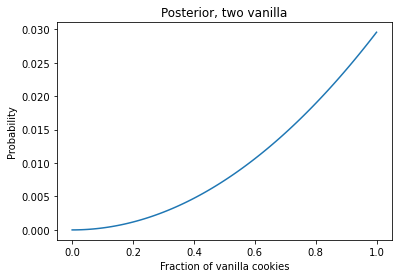

In [21]:
posterior2.plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Posterior, two vanilla');

### Exercise 2

Suppose we put the second cookie back, stir the bowl, draw from the same bowl again, and get a chocolate cookie.

Now what are the posterior probabilities?

In [22]:
# Solution

prior3 = posterior2
unnorm3 = prior3 * likelihood_chocolate
posterior3 = unnorm3 / unnorm3.sum()

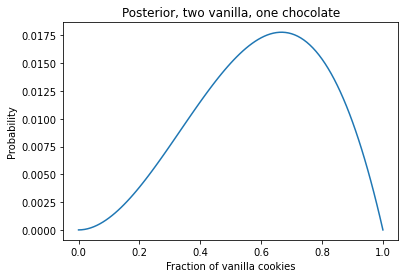

In [23]:
# Solution

posterior3.plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Posterior, two vanilla, one chocolate');

In [24]:
# Solution

posterior3.idxmax()

0.67